In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd

uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Variáveis Categóricas:** Variáveis que categorizam de alguma forma o dado.

***Dummies:*** Extraímos os *dummies* das strings para fazer as várias possibilidades das variáveis categóricas, neste caso, os gêneros. Usamos para isso o método *get_dummies()* da classe *str*.

In [ ]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [ ]:
# Classificação de cluster

from sklearn.cluster import KMeans


In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 0 ... 0 2 0]


# Aula 2 - Começando a Agrupar

***Kmeans*:** O KMeans trabalha com a ideia de centroides, isto é, achar pontos que fiquem nos centros dos clusters. Precisa passar como parâmetro o número de clusters desejados, que será o número de centroides adicionados para a iteração do algoritmo.

Tem um site bem legal para ver o algoritmo funcionando:

[https://www.naftaliharris.com/blog/visualizing-k-means-clustering/](https://)

In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.01658967 -0.02112649 -0.13750921 -0.25163248 -0.26888677  0.03439247
   0.07181545  0.05653793  0.16250074 -0.18433591  0.02241923 -0.3340552
  -0.08469844 -0.02518628 -0.02432168  0.08963843 -0.08626194 -0.02899473
   0.0491833   0.02183391]
 [-0.05917995  0.22671854  1.15104515  1.82831777  1.97216965  0.11004371
  -0.31197799 -0.19684015 -0.5966915   1.18814177 -0.08580943 -0.30266301
   0.58451657  0.2876272  -0.11876221 -0.27347887  0.26147596 -0.39807342
  -0.1666713  -0.08581446]
 [-0.05917995 -0.1071379  -0.30590593 -0.22455736 -0.26224445 -0.40331257
  -0.1889115  -0.20752995 -0.55917873  0.01782691 -0.07294117  2.99351719
  -0.03834113 -0.14863592  0.33458158 -0.37557644  0.36348103  0.70814326
  

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos = grupos.T

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b17956278>,
      dtype=object)

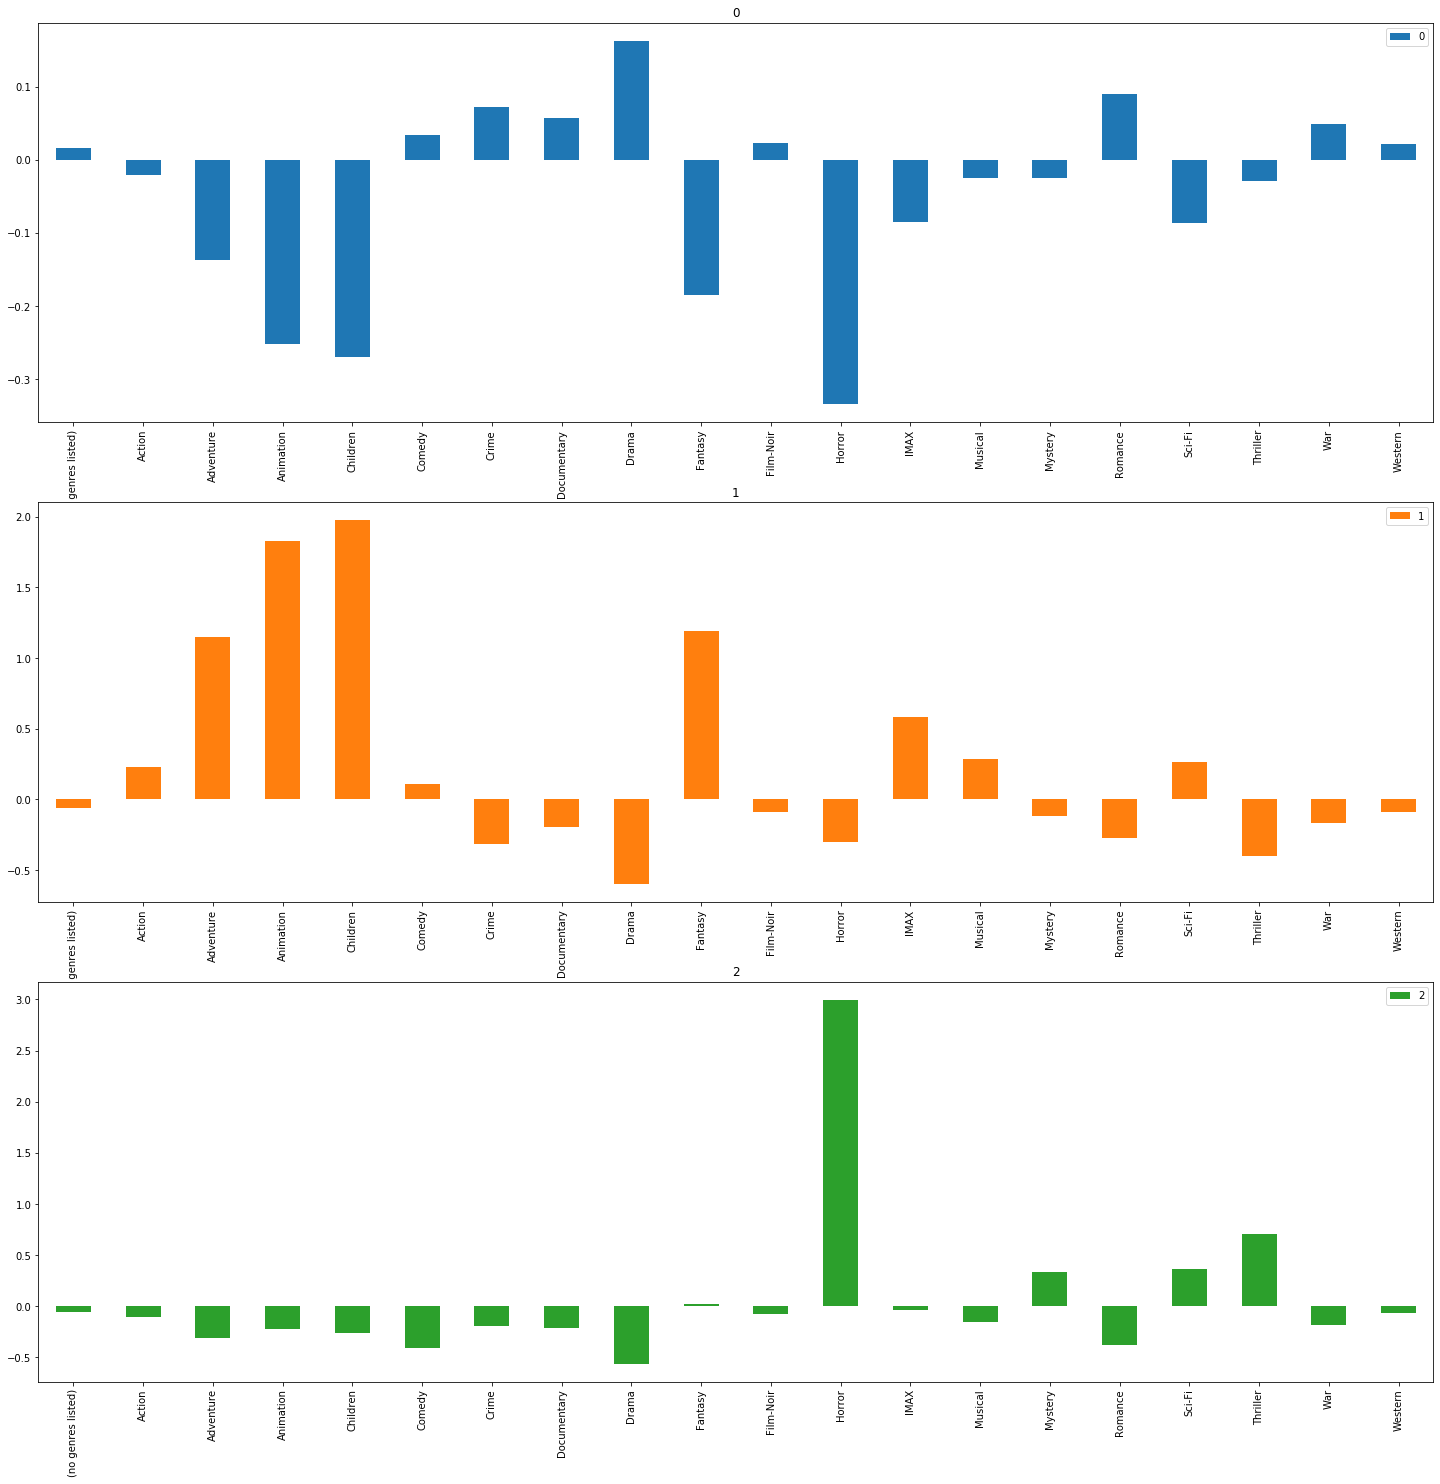

In [ ]:
grupos.plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [ ]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
841,1104,"Streetcar Named Desire, A (1951)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1906,2530,Beneath the Planet of the Apes (1970),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4913,7367,"Ladykillers, The (2004)",Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9562,173535,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6328,48741,"U.S. vs. John Lennon, The (2006)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6664,57368,Cloverfield (2008),Action|Mystery|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1445,1968,"Breakfast Club, The (1985)",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
745,973,Meet John Doe (1941),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
206,240,Hideaway (1995),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6832,61257,I.O.U.S.A. (a.k.a. IOUSA) (2008),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2,random_state=7)

In [ ]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


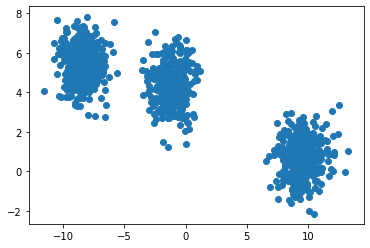

In [ ]:
# Cruzamos os dados das colunas e plotamos a distribuição
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [ ]:
# Solicitamos ao KMeans para criar um modelo com 3 grupos e segmentar os nossos dados baseado no modelo criado
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)


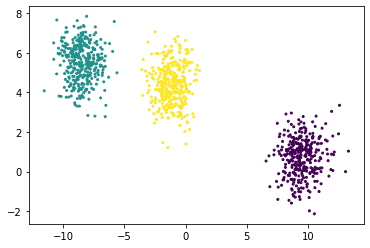

In [ ]:
# Plotamos os dados segmentados identificando os grupos com cores distintas (c=grupos) e vívidas (cmap='viridis')
plt.scatter(x = dados.coluna1, y = dados.coluna2, c = grupos,
            cmap = 'viridis', s = 4)

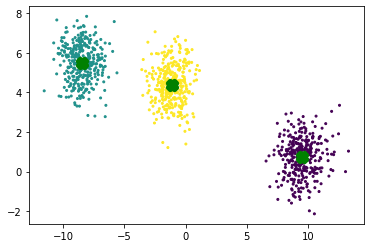

In [ ]:
# Geramos pontos centrais para os grupos, chamados centroides, e plotamos novamente nossos grupos
centroides = modelo.cluster_centers_
plt.scatter(x = dados.coluna1, y = dados.coluna2, c = grupos,
            cmap = 'viridis', s = 4)
plt.scatter(centroides[:, 0], centroides[:,1], marker = 'X', s = 70, linewidths = 5, color = 'g', zorder = 8)


In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE()

In [ ]:
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 18.183609 ,  61.931396 ],
       [ 12.954669 , -79.03314  ],
       [ 30.641546 ,  10.086546 ],
       ...,
       [-13.447339 , -19.940577 ],
       [-39.881577 , -20.812452 ],
       [  5.3921967,  12.101677 ]], dtype=float32)

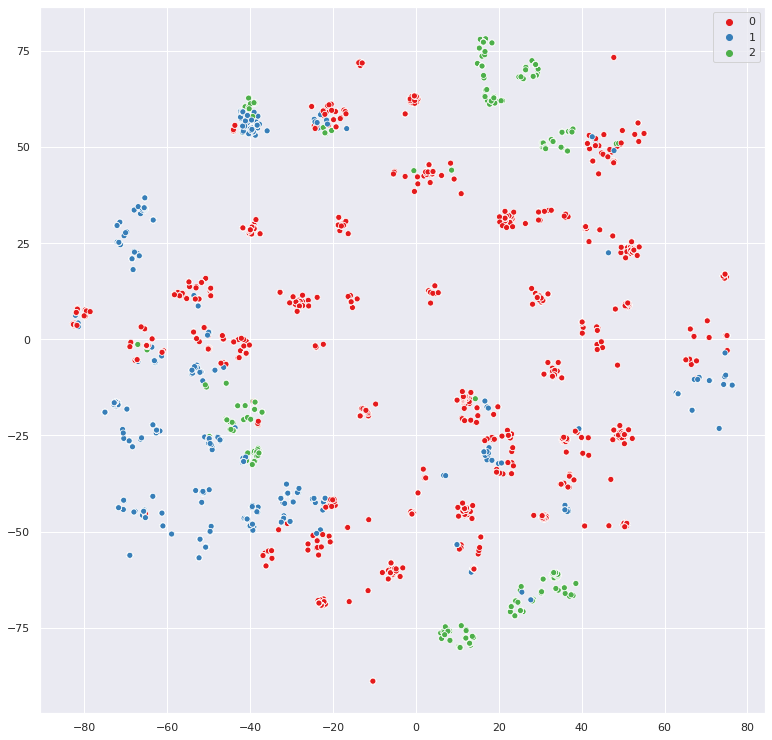

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize' : (13,13)})
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1',3))

In [ ]:
type(modelo.labels_)

numpy.ndarray

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0fcbd2e8>,
      dtype=object)

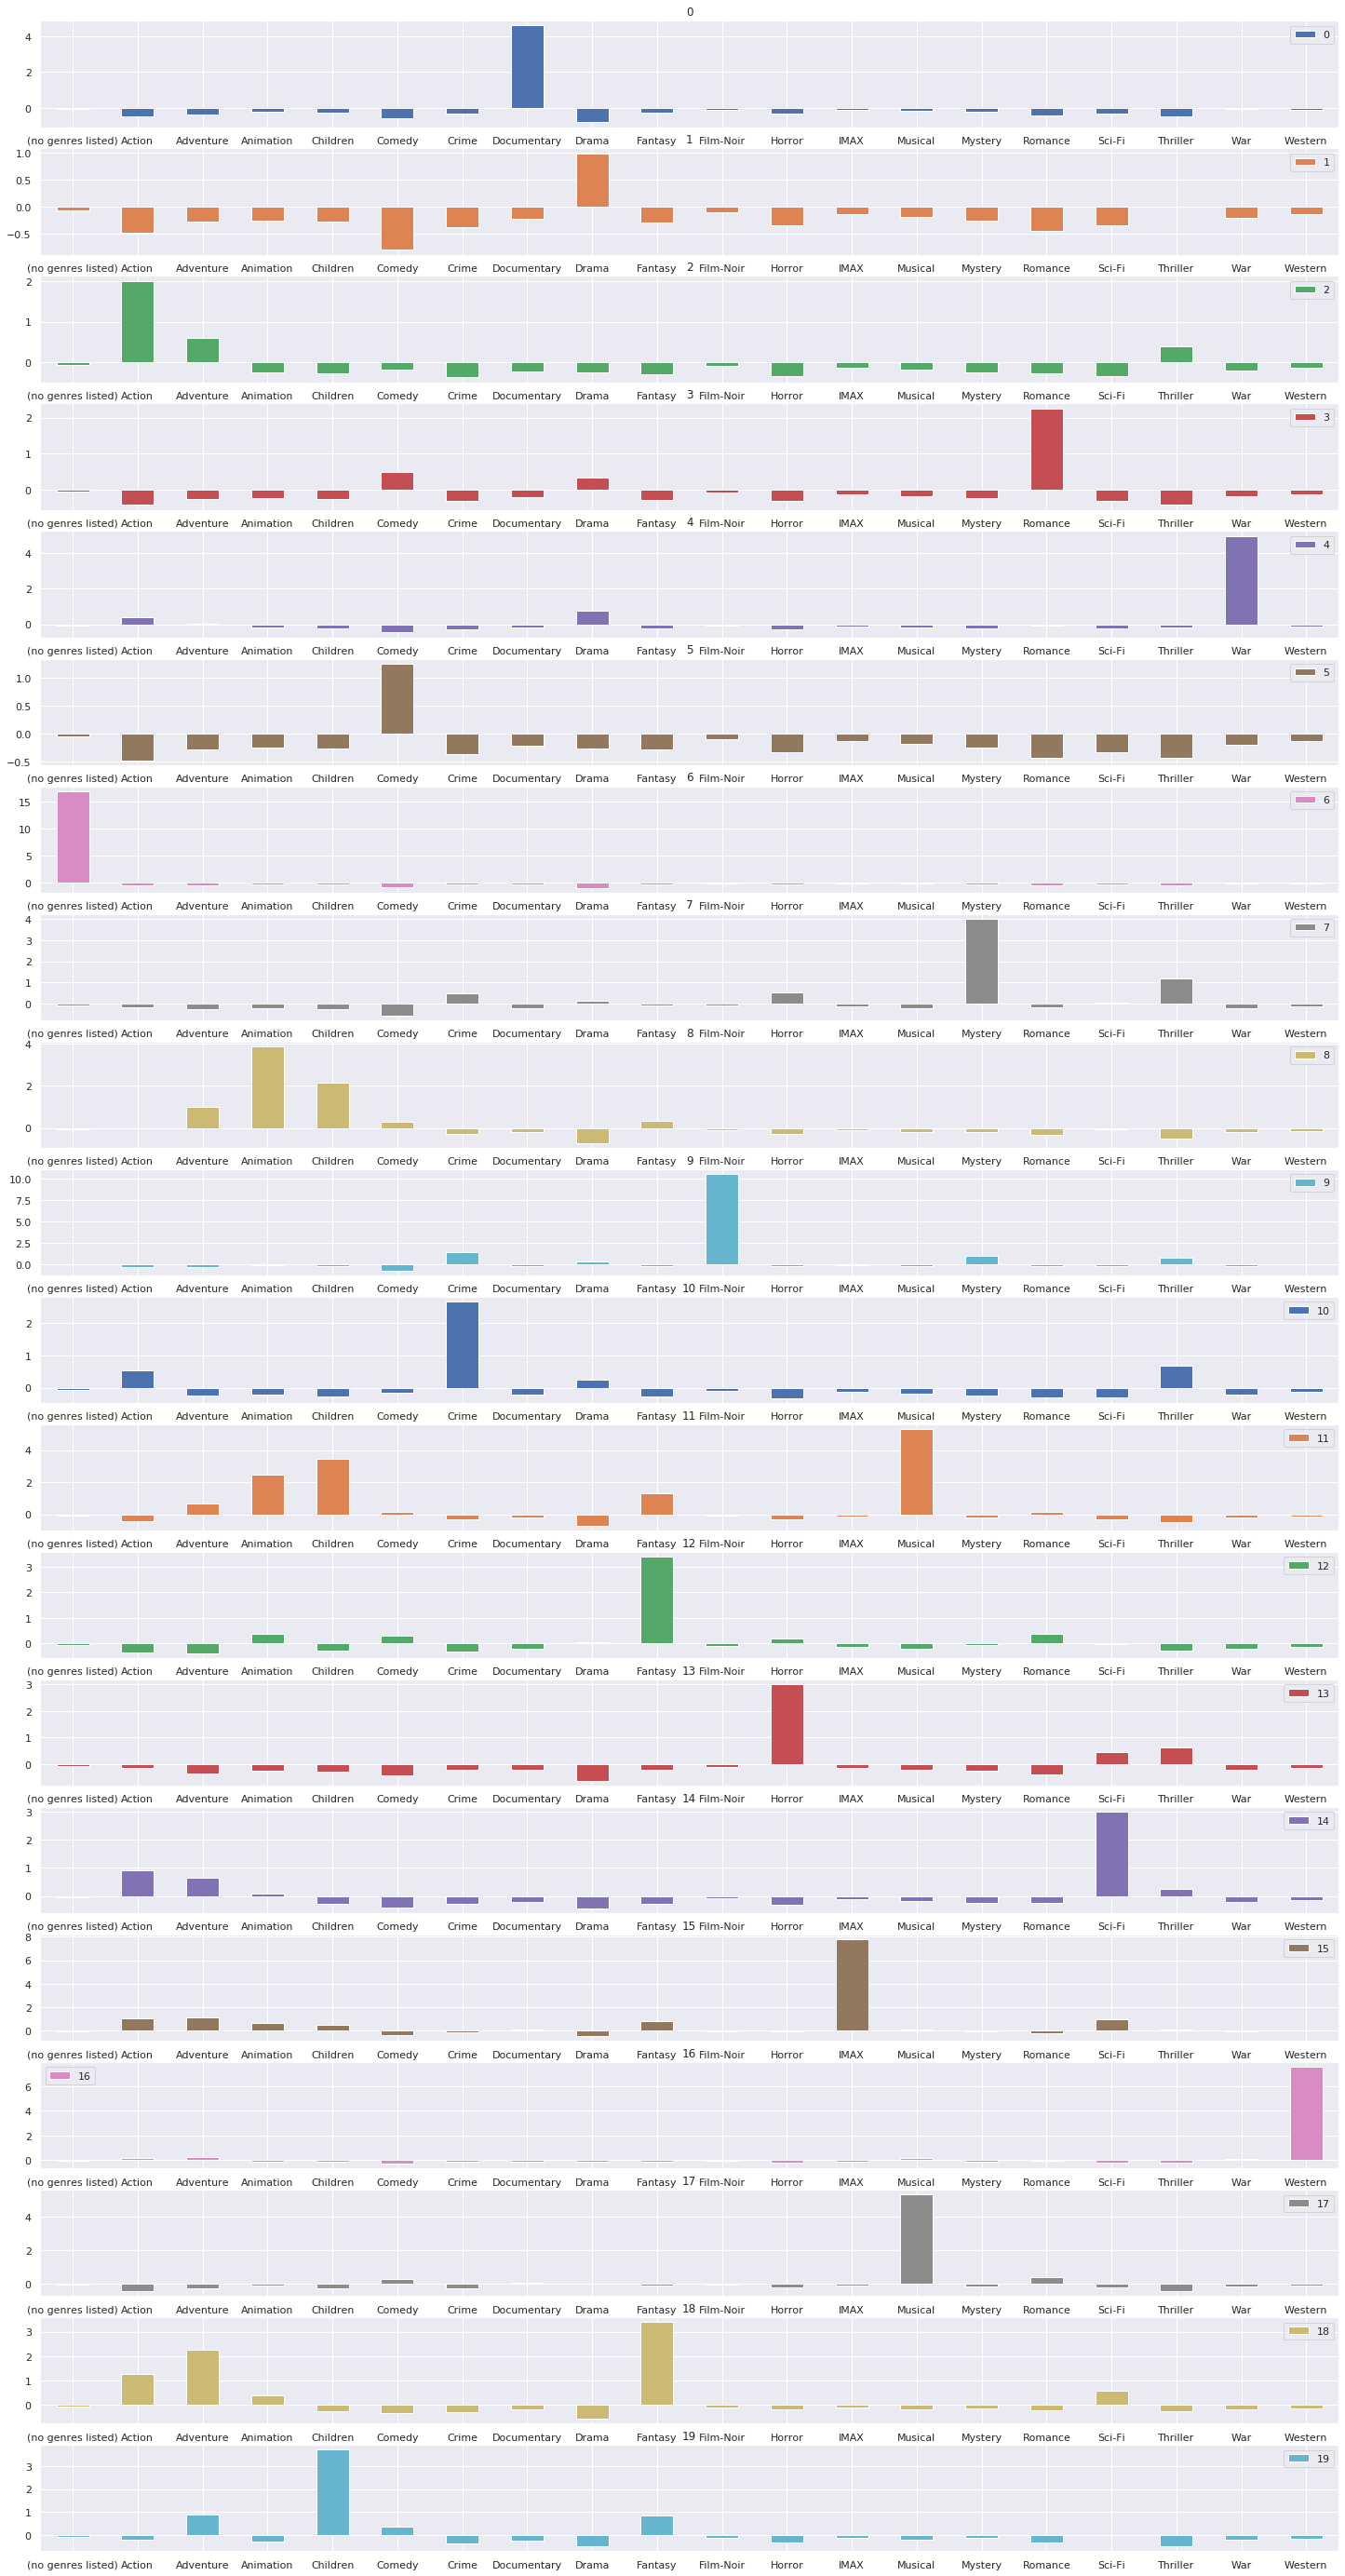

In [ ]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.T.plot.bar(subplots=True,figsize=(25,50),sharex=False, rot=0)

In [ ]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
431,494,Executive Decision (1996),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2677,3584,Breathless (1983),Action|Drama|Romance|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2199,2924,Drunken Master (Jui kuen) (1978),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6117,42946,Project A ('A' gai waak) (1983),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5346,8912,Taxi (2004),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4410,6506,Fulltime Killer (Chuen jik sat sau) (2001),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7234,73676,Robin-B-Hood (Bo bui gai wak) (2006),Action|Comedy|Drama,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7001,67695,Observe and Report (2009),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9287,158254,Kindergarten Cop 2 (2016),Action|Comedy,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20,generos_escalados)

[20, 54618.66657327925]

In [ ]:
kmeans(3, generos_escalados)

[3, 166170.9581503373]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado


[[1, 194840.0],
 [2, 179449.83965159106],
 [3, 166377.11769081352],
 [4, 156086.60614023067],
 [5, 146880.04975419692],
 [6, 138196.1142043924],
 [7, 128122.69012503685],
 [8, 119490.39104341691],
 [9, 111362.71784171154],
 [10, 101885.68693499352],
 [11, 94560.16623533846],
 [12, 86142.94015984901],
 [13, 83455.20586778886],
 [14, 76754.6964063923],
 [15, 68813.89163750396],
 [16, 65062.21144694008],
 [17, 60241.49398684741],
 [18, 59134.286886793576],
 [19, 57445.921905724026],
 [20, 54121.94096090116],
 [21, 54118.01193092068],
 [22, 52429.961313332744],
 [23, 50115.239143936145],
 [24, 49947.98429667213],
 [25, 47665.63372960079],
 [26, 47442.1459298024],
 [27, 45468.52079349372],
 [28, 45040.60737449981],
 [29, 44195.47828142045],
 [30, 42557.39382886555],
 [31, 41205.095981852784],
 [32, 40538.85430916284],
 [33, 39564.973643919446],
 [34, 39866.633873532875],
 [35, 38037.40541609292],
 [36, 37881.58111870375],
 [37, 36932.5715242852],
 [38, 35699.65620447251],
 [39, 36701.186549

In [ ]:
resultado = pd.DataFrame(resultado, columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179449.839652
2,3,166377.117691
3,4,156086.606140
4,5,146880.049754
5,6,138196.114204
6,7,128122.690125
7,8,119490.391043
8,9,111362.717842
9,10,101885.686935


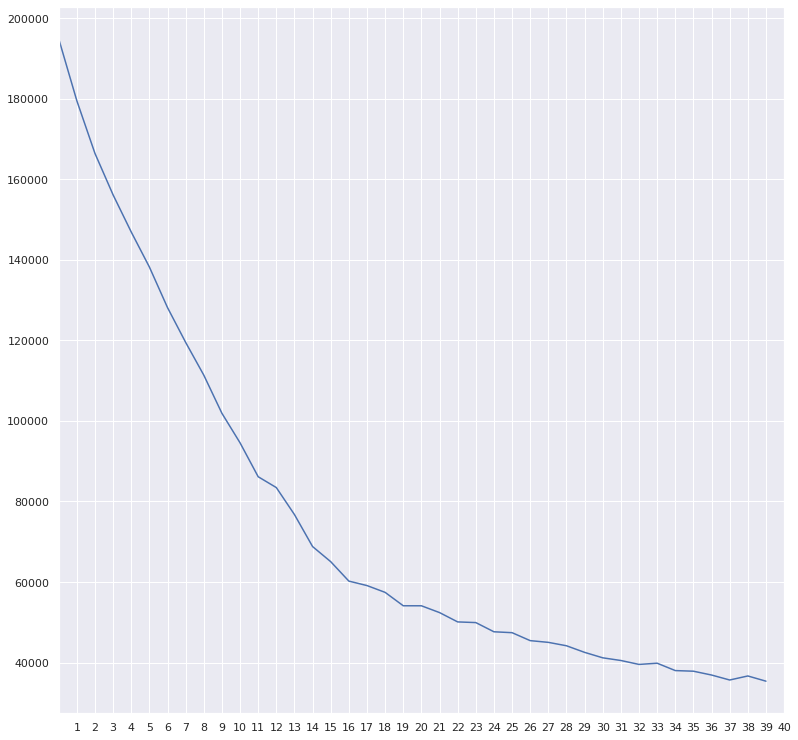

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0d9ee5f8>,
      dtype=object)

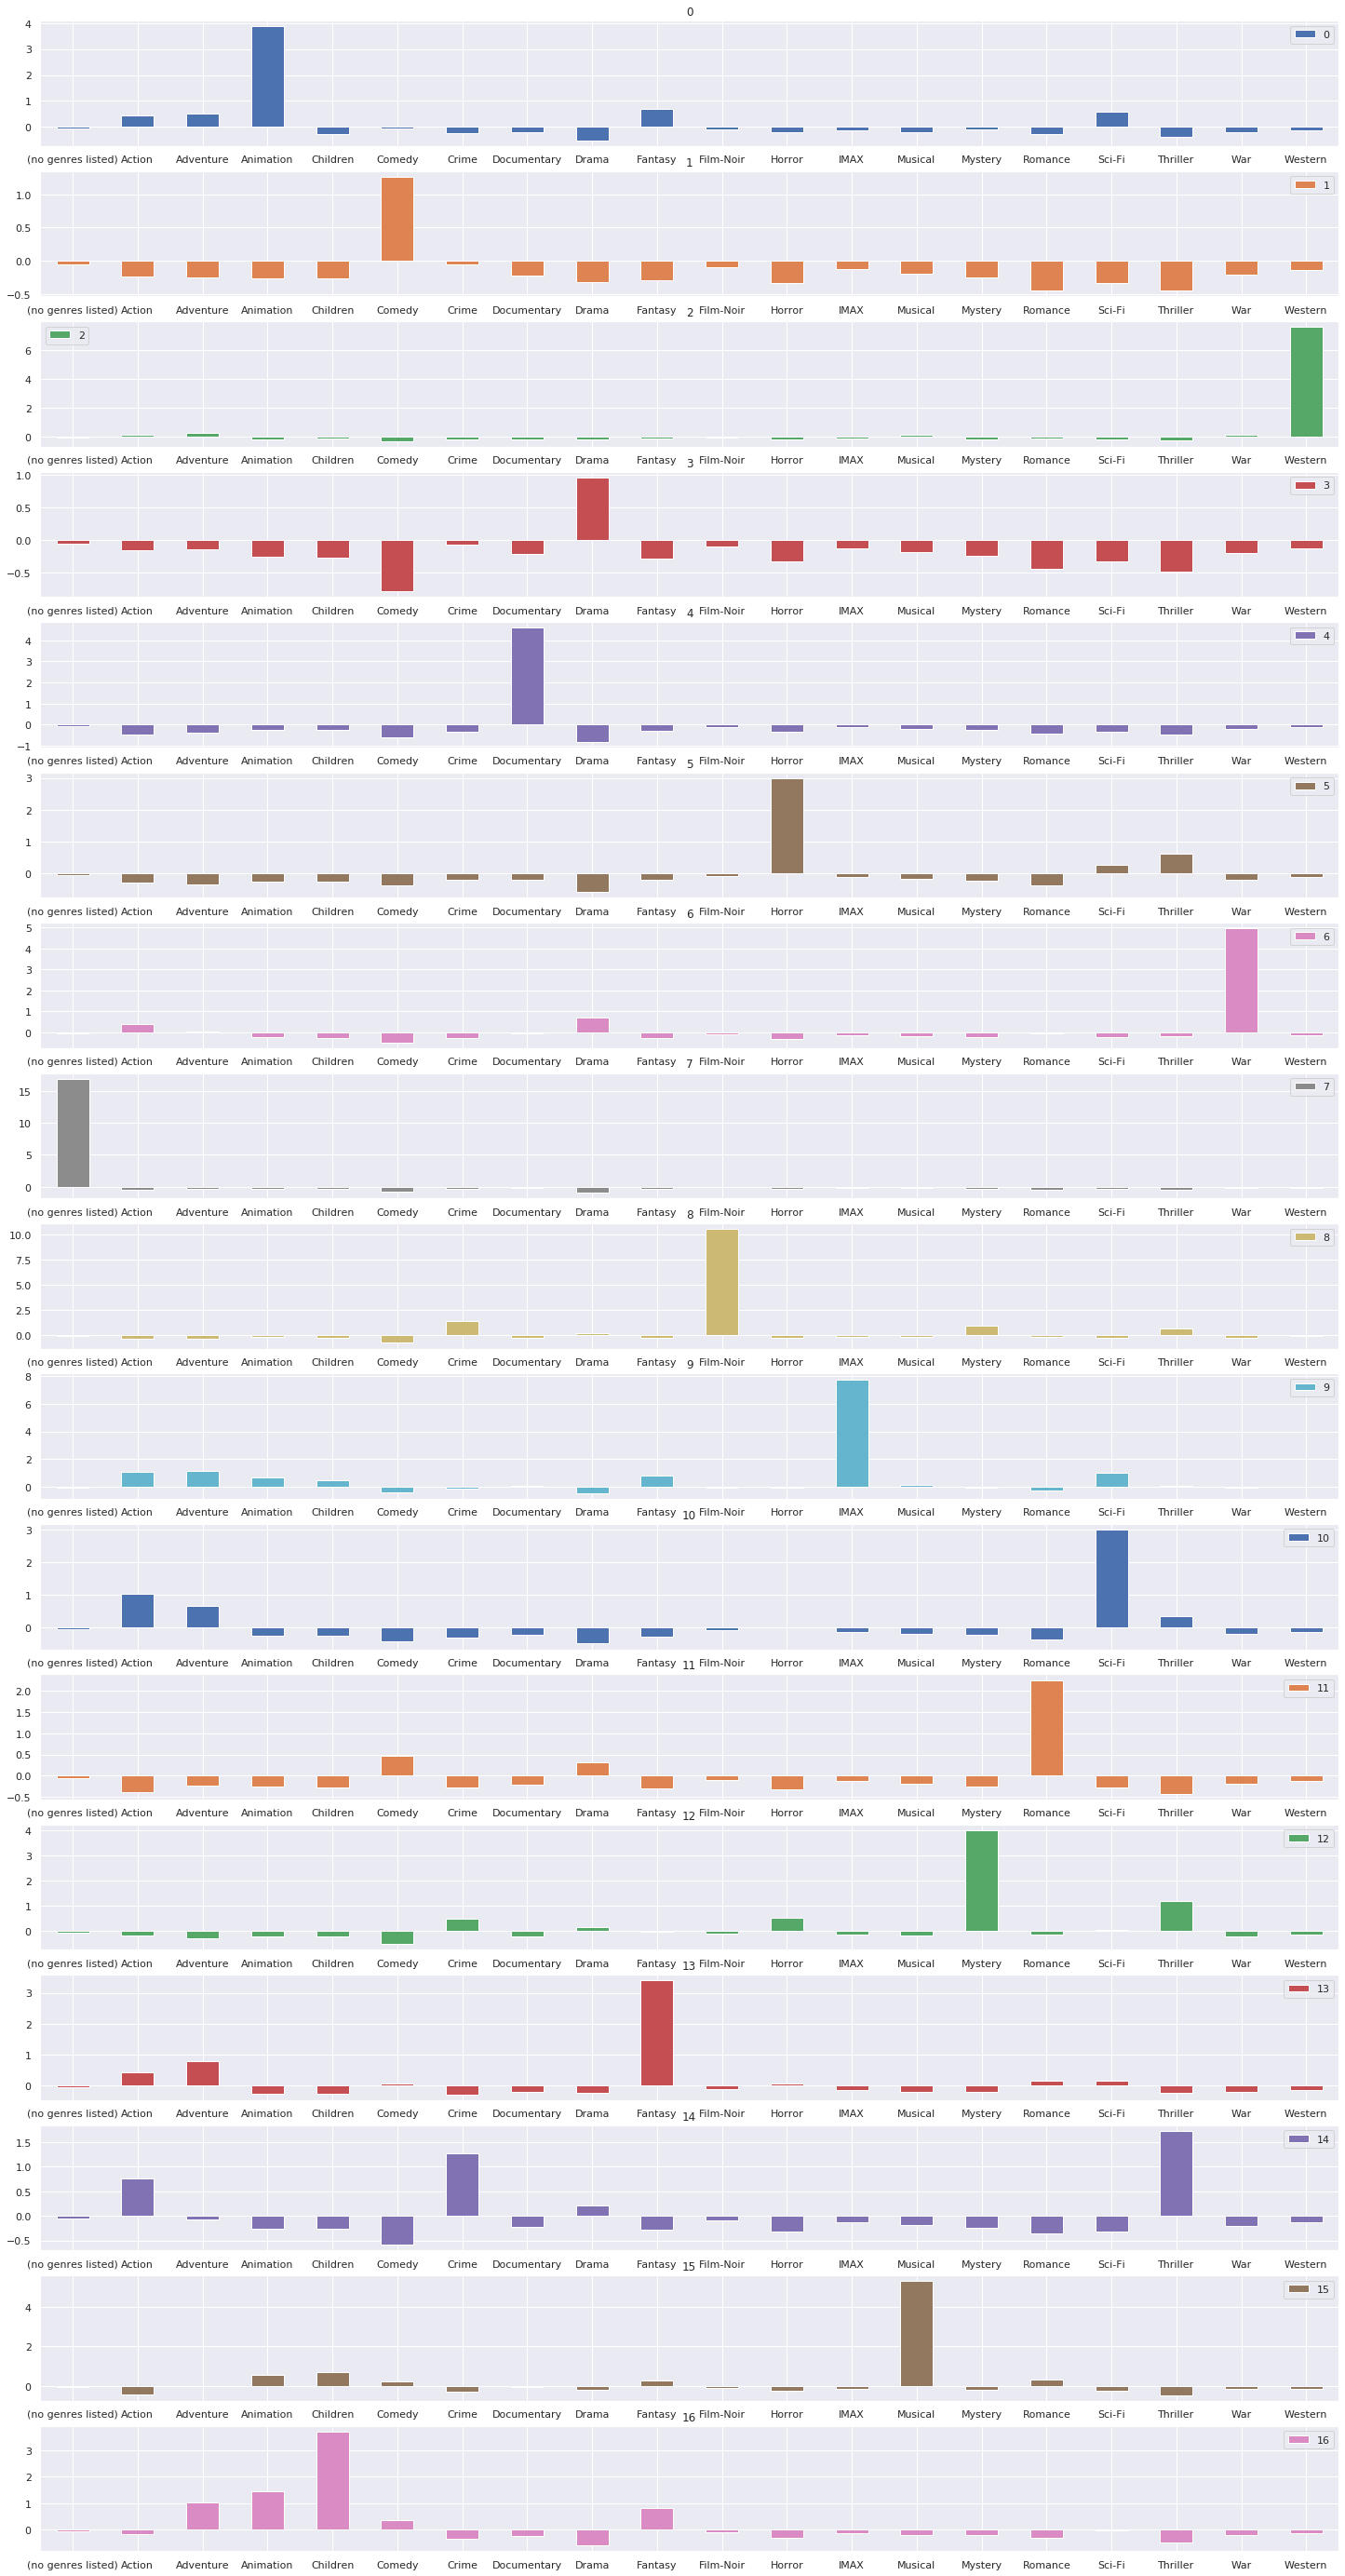

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.T.plot.bar(subplots=True,figsize=(25,50),sharex=False, rot=0)

***Elbow Mwthod*:** Plota os erros (inertia) do KMeans e o ponto do cotovelo é o erro otimizado.

**Agrupamento Hierárquico:** Hierarquiza os labels para saber mais coisas para recomendar.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)

In [ ]:
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 69.70969   ,  -9.959133  ],
       [-10.936672  , -57.69985   ],
       [-39.651455  ,  -1.7810798 ],
       ...,
       [ 11.201764  ,  -9.769648  ],
       [-14.783616  , -35.843548  ],
       [ -0.52006865,  27.171637  ]], dtype=float32)

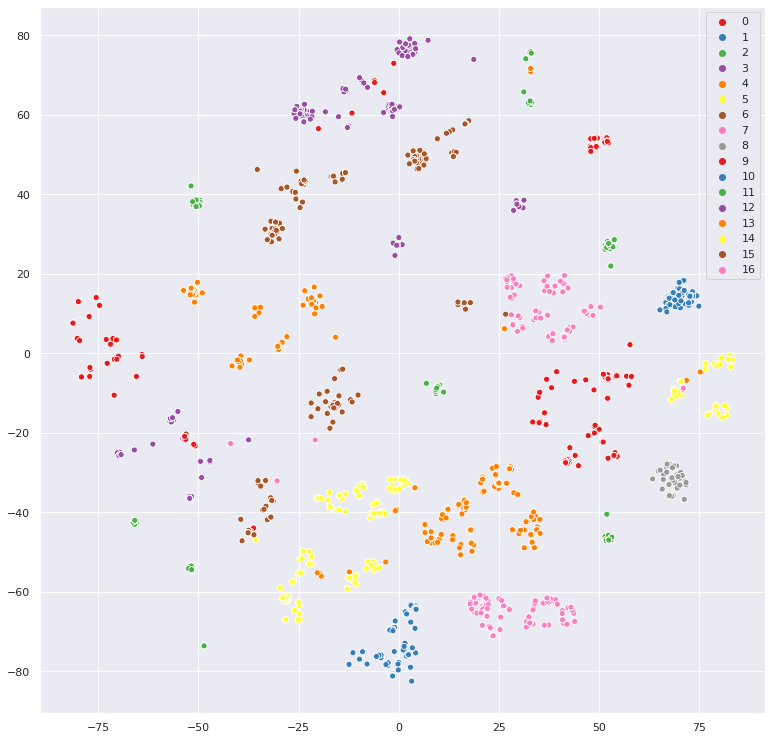

In [ ]:
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1], hue = grupos, palette=sns.color_palette('Set1', 17))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0cac80f0>,
      dtype=object)

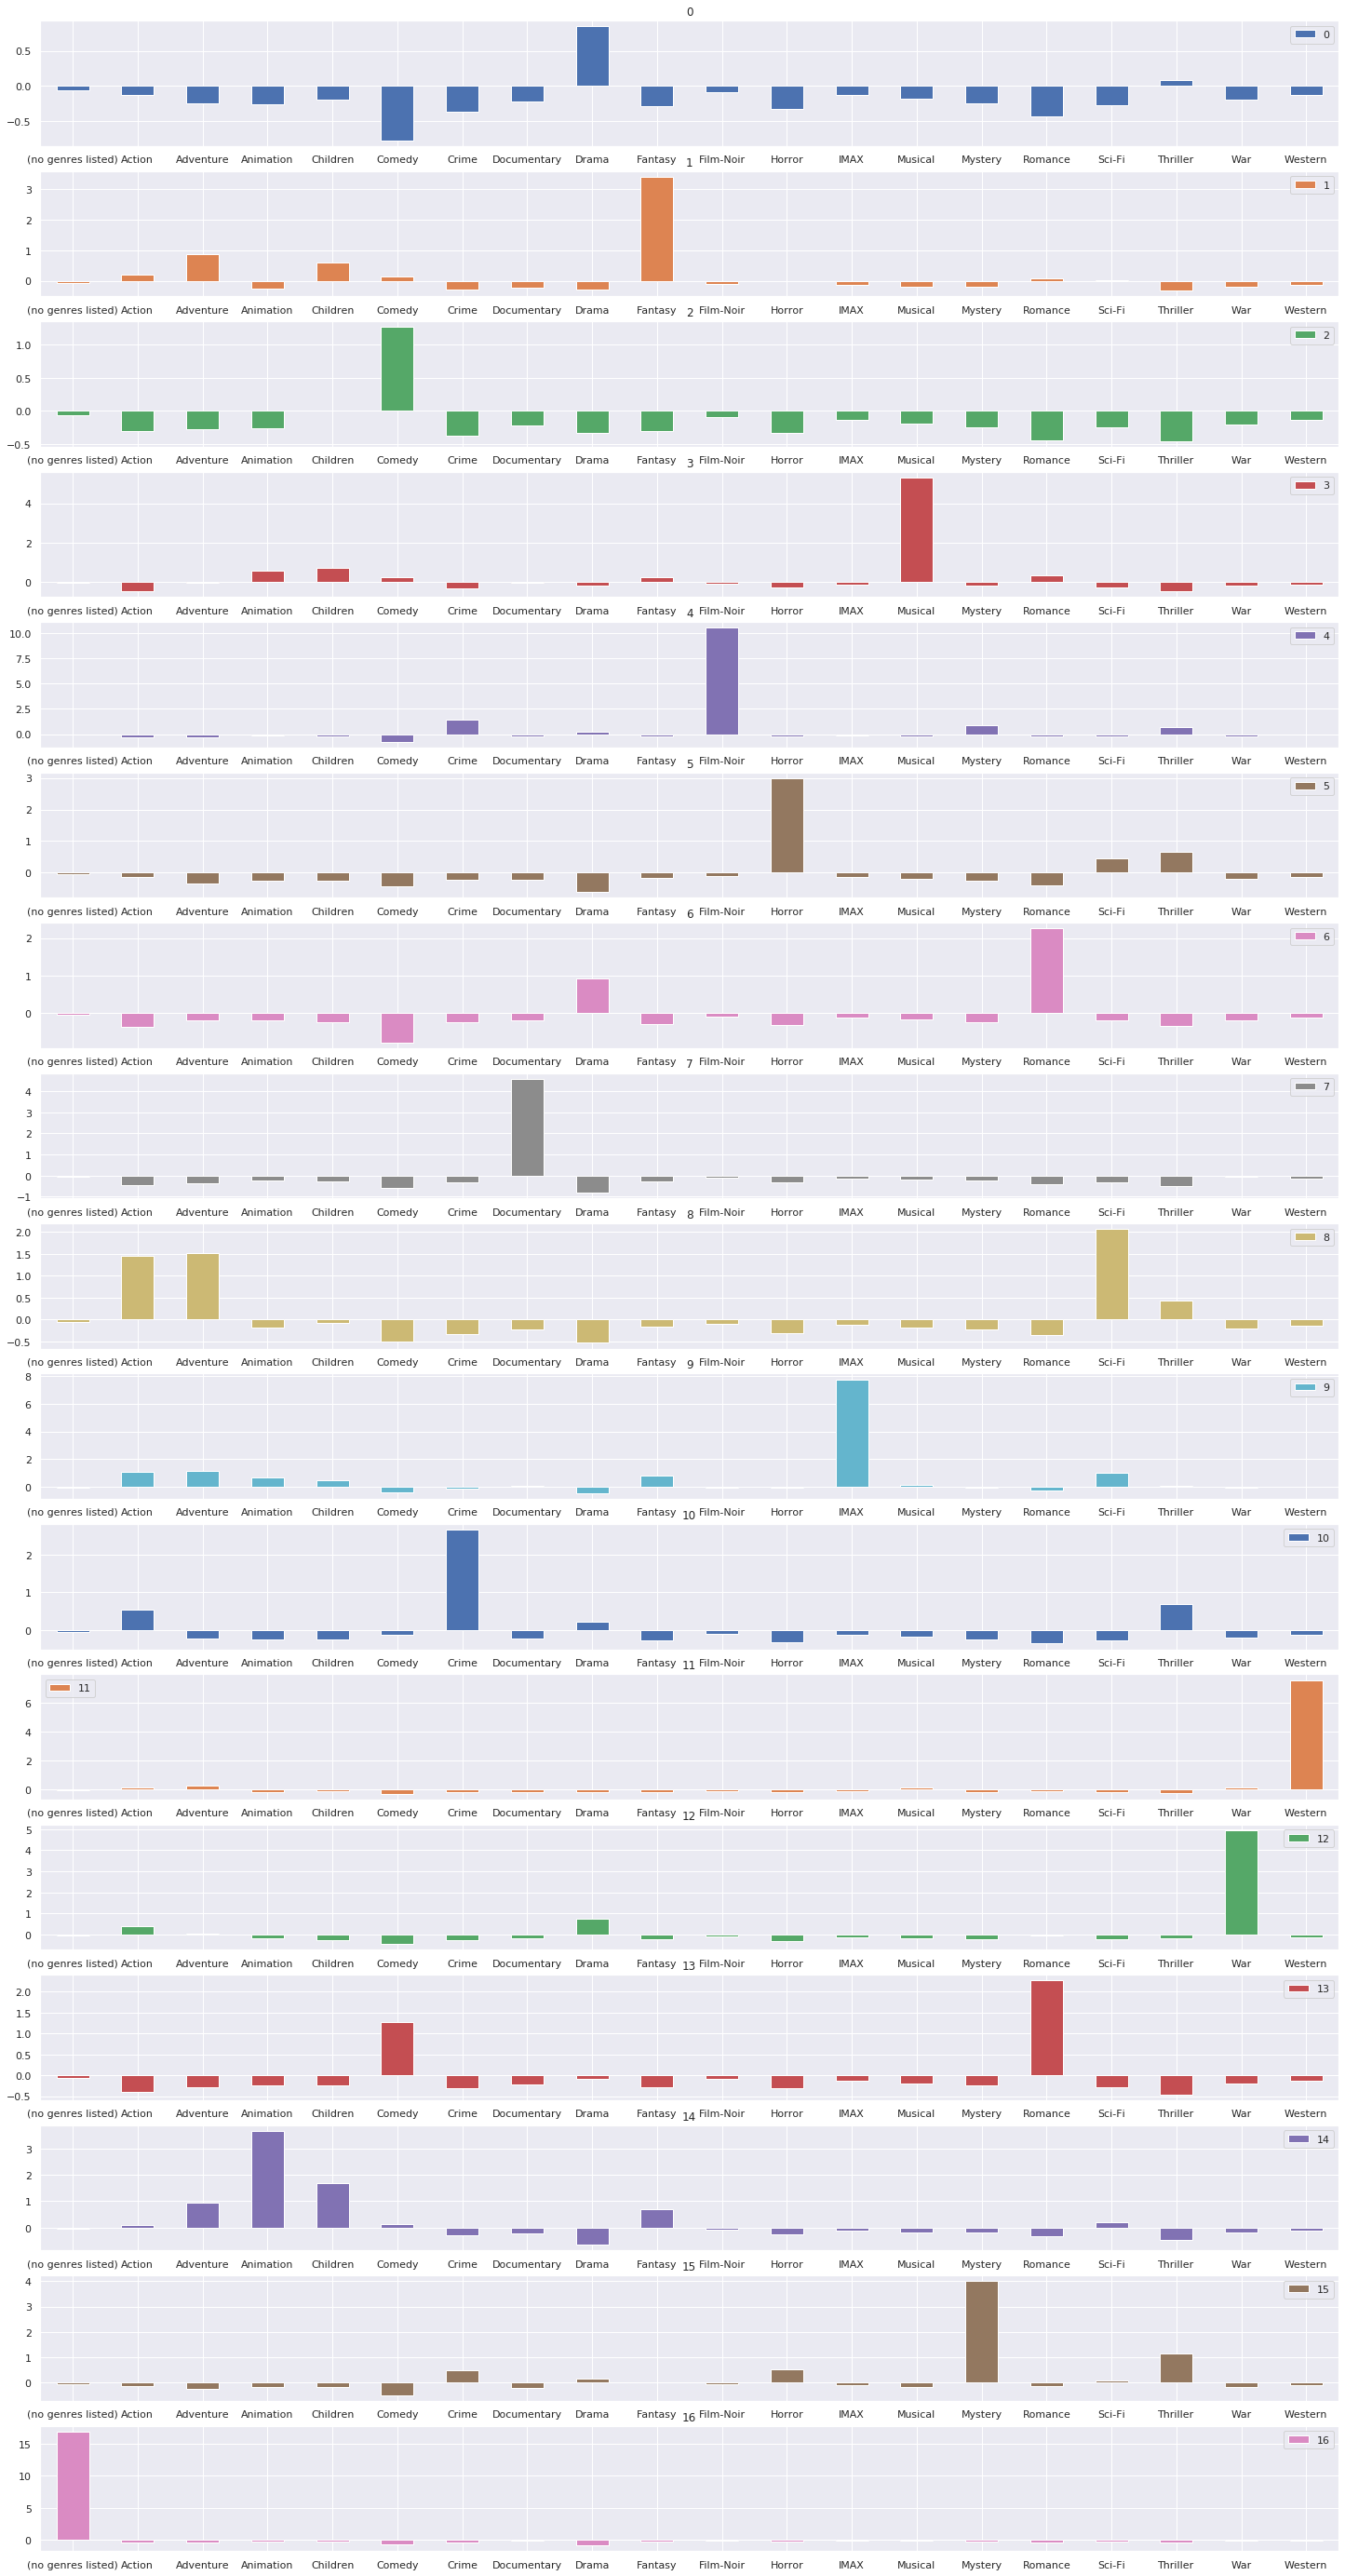

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.T.plot.bar(subplots=True,figsize=(25,50), sharex=False,rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 6.        , 13.        ,  2.29658298,  2.        ],
       [ 0.        ,  2.        ,  2.42804375,  2.        ],
       [17.        , 18.        ,  2.72607848,  4.        ],
       [10.        , 19.        ,  3.30358583,  5.        ],
       [ 8.        , 20.        ,  3.64085544,  6.        ],
       [ 5.        , 21.        ,  3.77214829,  7.        ],
       [ 1.        , 22.        ,  4.14701408,  8.        ],
       [15.        , 23.        ,  4.63792836,  9.        ],
       [14.        , 24.        ,  4.75843648, 10.        ],
       [ 7.        , 25.        ,  5.14011134, 11.        ],
       [12.        , 26.        ,  5.22135911, 12.        ],
       [ 3.        , 27.        ,  5.78537634, 13.        ],
       [11.        , 28.        ,  7.84161727, 14.        ],
       [ 9.        , 29.        ,  8.15704172, 15.        ],
       [ 4.        , 30.        , 10.81920621, 16.        ],
       [16.        , 31.        , 17.06066293, 17.        ]])

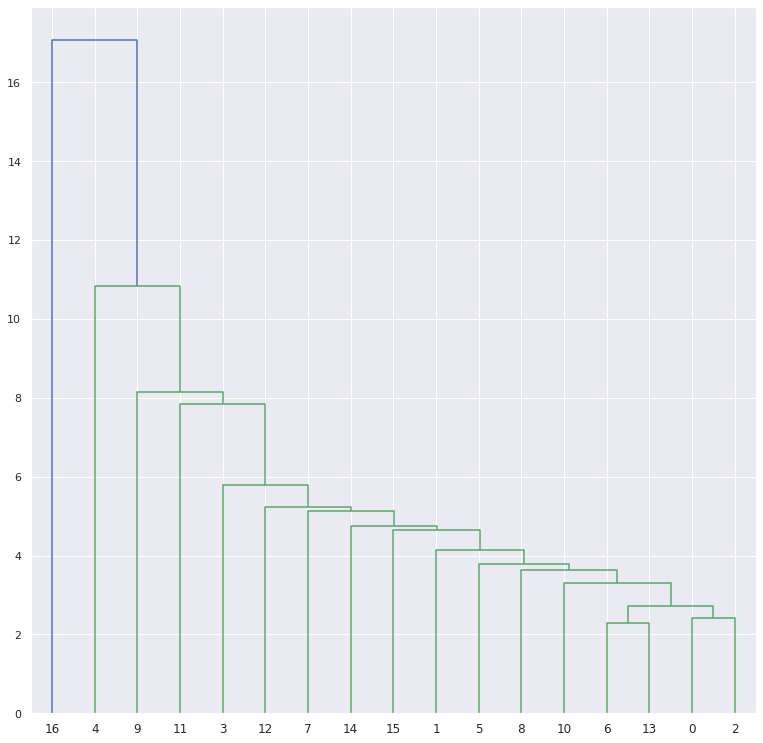

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)